In [4]:
!pip install textstat

In [5]:
#Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

import re
import gensim

from tqdm import tqdm
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# Load the language model
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')


stop=set(stopwords.words('english'))
plt.style.use('seaborn')


from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import textstat
from textblob import TextBlob
from tqdm import tqdm
from statistics import *
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# from google.colab import files
# uploaded = files.upload()

Saving twitter.csv to twitter.csv


<a id="1"></a>
    
<font size="+2" color="indigo"><b>1. Data</b></font><br>

In [22]:


#not an API, Twitter API solely for obtaining real-time data.

df=pd.read_csv('./twitter.csv', encoding = "ISO-8859-1")
df=df.dropna()
df

# df=pd.read_csv('twitter.csv', encoding = "ISO-8859-1")
# df.

,text,Sentiment
0,"RT @NorthmanTrader: $SPX 10,000.\nNo growth re...",Neutral
1,$MRO Possible gap fill to $6.76 today with OPE...,Neutral
2,The race to 50 Million subscribers... \n- $AMZ...,Neutral
3,RT @LMT978: $SPX is 19% off the high and +25% ...,Neutral
4,RT @RedDogT3: $spx keeps holding 2761 as weake...,Negative
...,...,...
22503,@Matt_Cochrane7 Definitely $AAPL. Even worse. ...,Negative
22504,RT @TrendSpider: $GOOG #GOOG Hard bounce out o...,Neutral
22505,RT @joepete58: I guess Iâm lucky I did Apple...,Positive
22506,$MSFT Microsoft has been resting and consolida...,Positive


In [23]:

# df=df[['text','Sentiment']]
df.head()

,text,Sentiment
0,"RT @NorthmanTrader: $SPX 10,000.\nNo growth re...",Neutral
1,$MRO Possible gap fill to $6.76 today with OPE...,Neutral
2,The race to 50 Million subscribers... \n- $AMZ...,Neutral
3,RT @LMT978: $SPX is 19% off the high and +25% ...,Neutral
4,RT @RedDogT3: $spx keeps holding 2761 as weake...,Negative


In [24]:

print(df.head())
print("\n")
print(df.info())

                                                text Sentiment
0  RT @NorthmanTrader: $SPX 10,000.\nNo growth re...   Neutral
1  $MRO Possible gap fill to $6.76 today with OPE...   Neutral
2  The race to 50 Million subscribers... \n- $AMZ...   Neutral
3  RT @LMT978: $SPX is 19% off the high and +25% ...   Neutral
4  RT @RedDogT3: $spx keeps holding 2761 as weake...  Negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22508 entries, 0 to 22507
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22508 non-null  object
 1   Sentiment  22508 non-null  object
dtypes: object(2)
memory usage: 351.8+ KB
None


In [25]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (22508, 2)


In [26]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})

print ("Null Values in each column:\n", missing_data)


Null Values in each column:
    column name  Total missing  Percent missing
0         text              0              0.0
1    Sentiment              0              0.0


<Axes: >

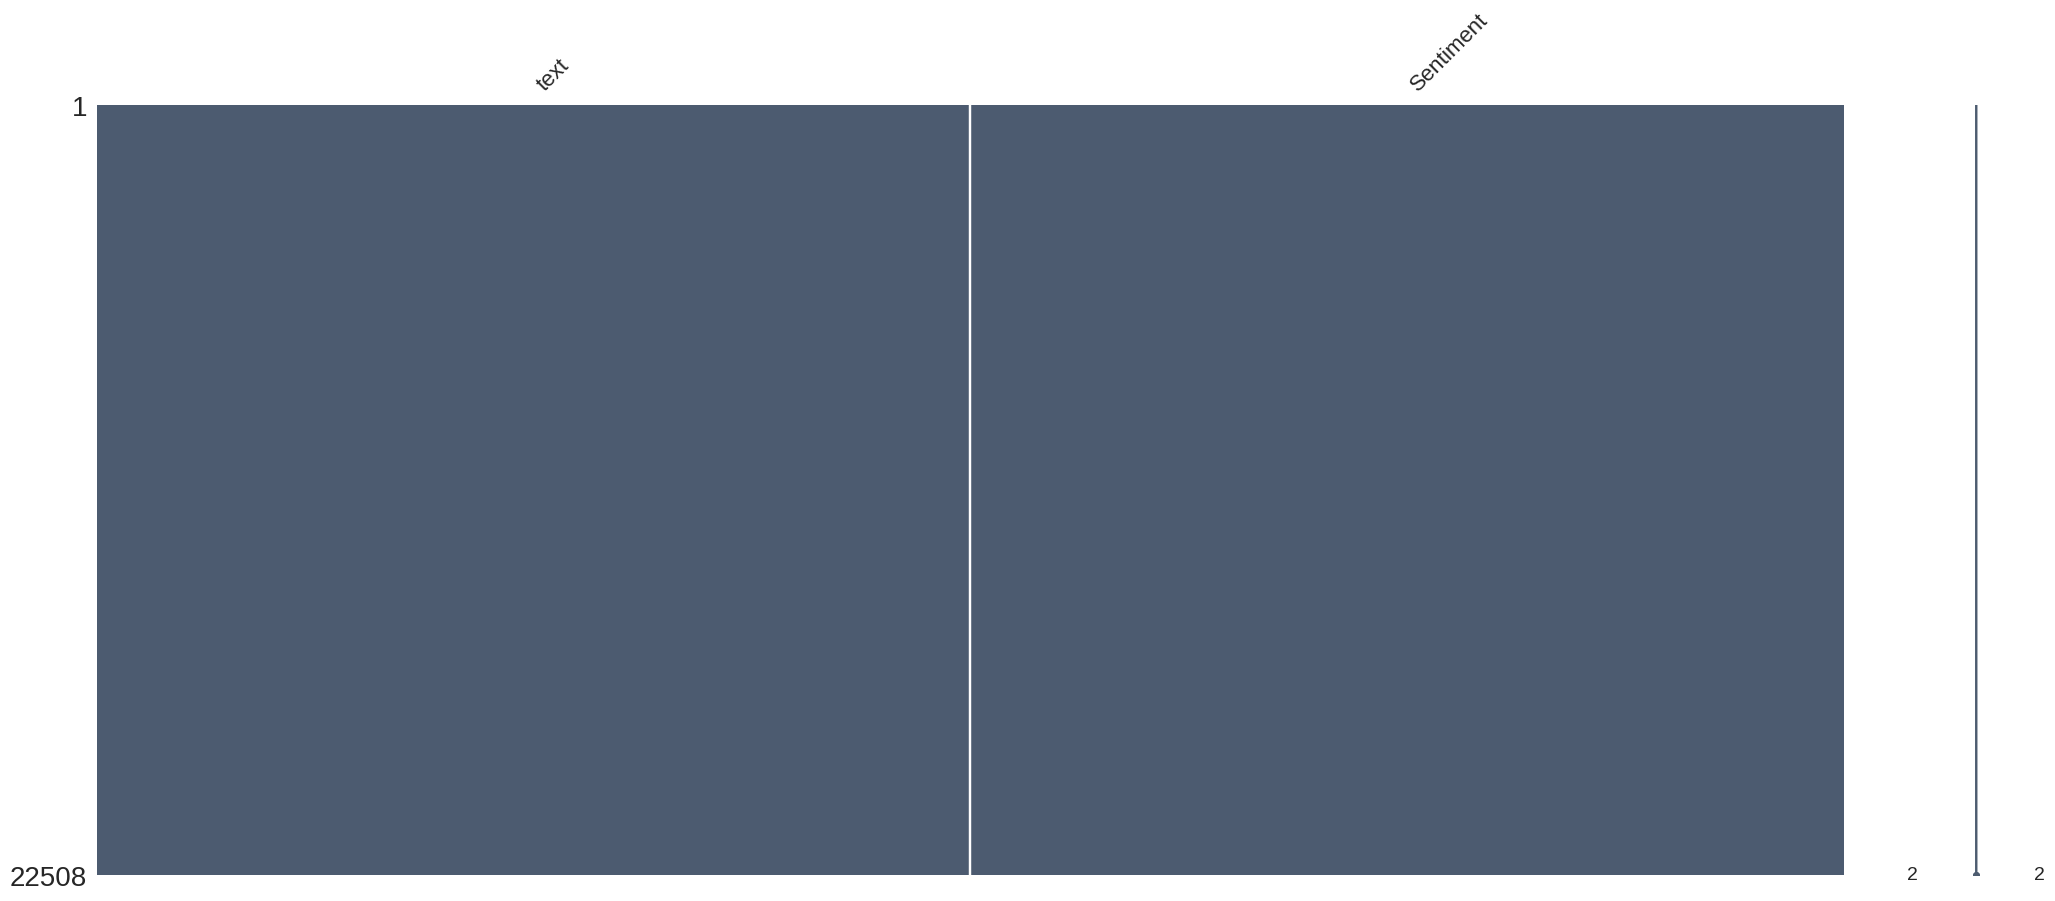

In [27]:
#Missing data as white lines
import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

#### Null values in location

In [28]:
print('Total headlines in this data: {}'.format(df.shape[0]))
print('Total Unique Users in this data: {}'.format(df['Sentiment'].nunique()))

Total headlines in this data: 22508
Total Unique Users in this data: 3


In [29]:
print(df.Sentiment.unique())
print(df.Sentiment.value_counts())

['Neutral' 'Negative' 'Positive']
Negative    7508
Neutral     7500
Positive    7500
Name: Sentiment, dtype: int64


In [30]:

df.Sentiment.value_counts()


Negative    7508
Neutral     7500
Positive    7500
Name: Sentiment, dtype: int64

# EDA, Metafeatures & Viz

<a id="2"></a>
    
<font size="+2" color="indigo"><b>2. Class Distribution</b></font><br>


In [31]:
class_df = df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Sentiment,text
0,Negative,7508
1,Neutral,7500
2,Positive,7500


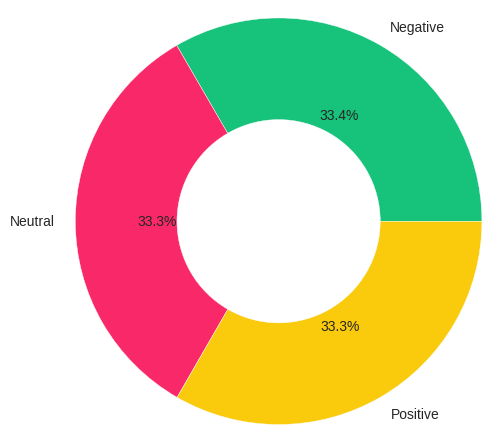

In [32]:
percent_class=class_df.text
labels= class_df.Sentiment

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white')

plt.show()



In [33]:
train, test = train_test_split(df, test_size=0.2, random_state=25)


## The colors used above will represent the classes ahead.

In [34]:
# fig=make_subplots(1,2,subplot_titles=('Train set','Test set'))
# x=train.Sentiment.value_counts()
# fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='train'),row=1,col=1)
# x=test.Sentiment.value_counts()
# fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='test'),row=1,col=2)

#### Same pattern of uneven distribution in both train and test data



<a id="3"></a>
    
<font size="+2" color="indigo"><b>3. Number of characters</b></font><br>


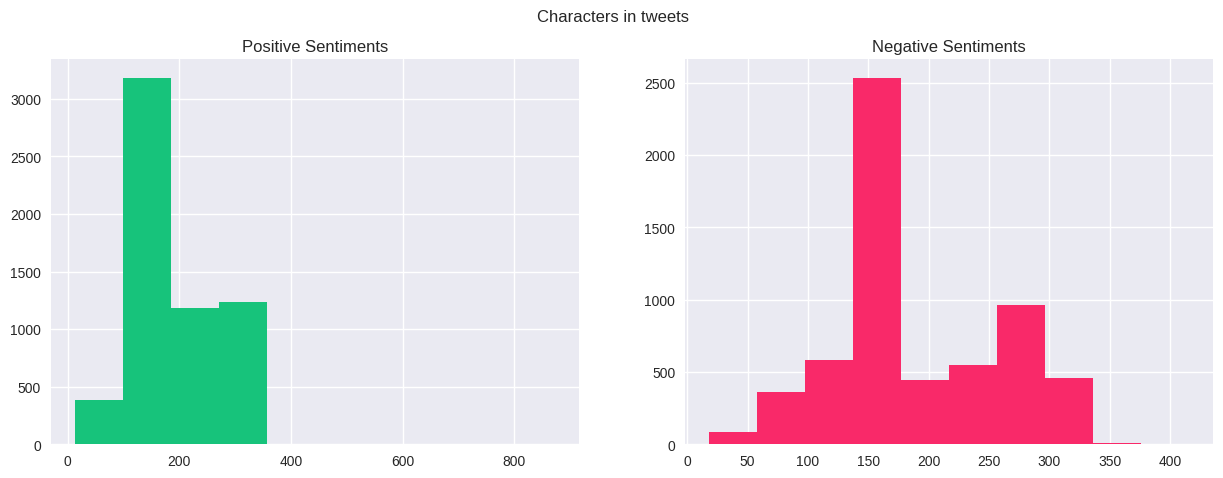

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=train[train['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')


fig.suptitle('Characters in tweets')
plt.show()



<a id="4"></a>
    
<font size="+2" color="indigo"><b>4. Number of words in a Headline</b></font><br>





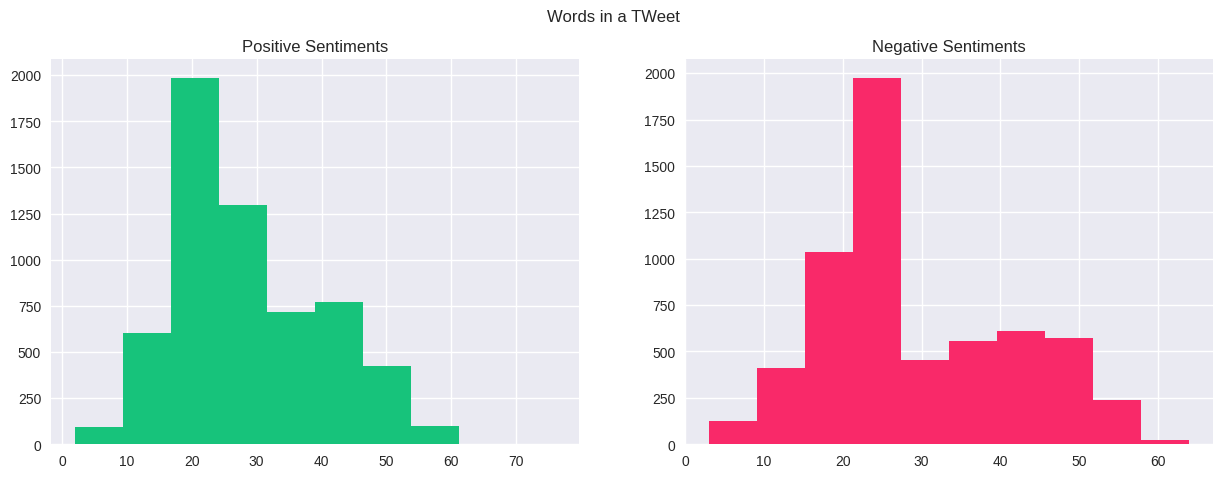

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=train[train['Sentiment']=="Positive"]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_len=train[train['Sentiment']=="Negative"]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')


fig.suptitle('Words in a TWeet')
plt.show()



<a id="5"></a>
    
<font size="+2" color="indigo"><b>5. Average word length in a Headline</b></font><br>






Text(0.5, 0.98, 'Average word length in each Twitter')

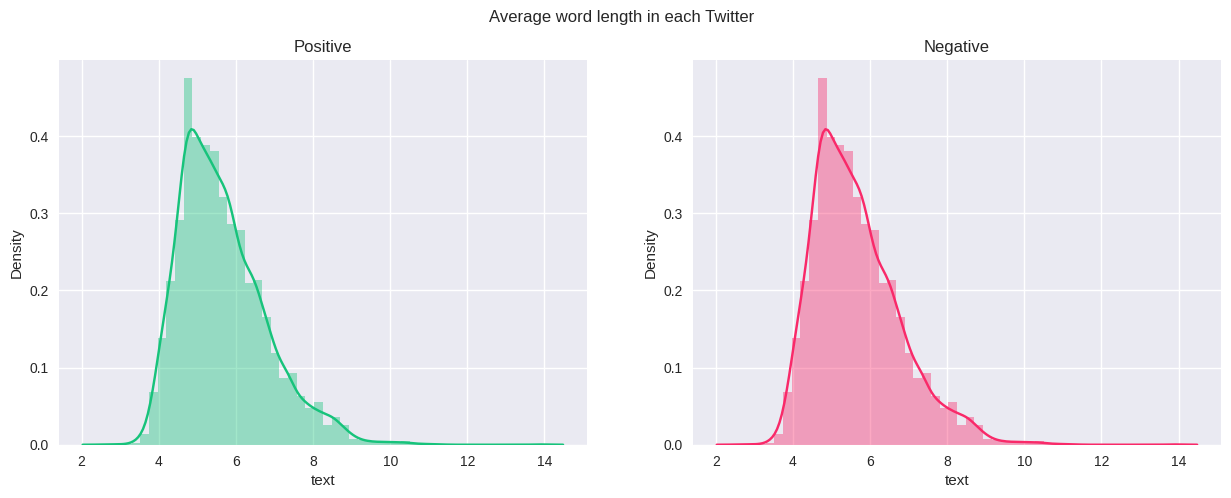

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

word=train[train['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=train[train['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')


fig.suptitle('Average word length in each Twitter')



<a id="6"></a>
    
<font size="+2" color="indigo"><b>6. Common Stopwords in the Headline</b></font><br>



In [38]:
def create_corpus(target):
    corpus=[]

    for x in train[train['Sentiment']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [39]:
np.array(stop)

array({'most', 'yourselves', 'having', 'few', 'each', "wasn't", 'at', 'after', 'than', "you'd", 'up', 'down', 'her', "shouldn't", 'she', "aren't", "that'll", 'any', 'before', 'but', 'below', 'm', 'nor', 'against', 'haven', "haven't", 'of', 'too', 'yourself', "shan't", 'where', 'them', 'once', 'has', 'yours', 's', 'ourselves', 'doing', 'mightn', 'who', 'and', 'because', 'did', 'shouldn', "weren't", 'i', 'is', "you're", 'hadn', 'here', 'been', 'was', 'ma', 'his', "didn't", 'to', 'from', "needn't", 'be', 'needn', 'hers', "should've", 'will', 'very', 'their', "couldn't", 'myself', "you've", 'll', 'just', 'wouldn', 'then', 'during', 'can', 'by', 'it', 'there', 'himself', 'other', 'those', 'not', 'he', "it's", 'in', 'herself', 'theirs', 'ain', 'own', 'being', "don't", 'y', 'until', 'weren', 'had', 'under', 'why', "hadn't", 'if', 'how', 'these', 'whom', 'more', 're', 'above', "doesn't", "hasn't", 'couldn', 'as', "wouldn't", 'are', 'a', 'him', 'on', 'out', 'they', 'such', 'so', 'mustn', 'off',

In [40]:
# comment_words = ''
# stopwords = set(STOPWORDS)


# for val in stop:

#     # typecaste each val to string
#     val = str(val)

#     # split the value
#     tokens = val.split()

#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()

#     comment_words += " ".join(tokens)+" "
# print("comment_words",stopwords)

# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)

# # plot the WordCloud image
# plt.figure(figsize = (8, 8), facecolor = "white")
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

# plt.show()


<BarContainer object of 10 artists>

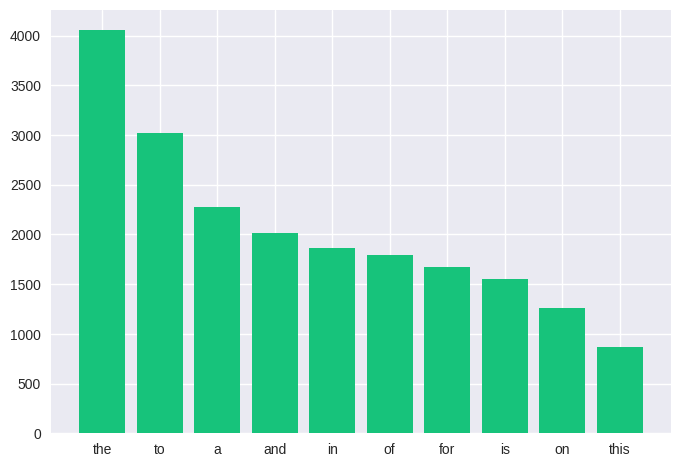

In [41]:
corpus=create_corpus("Positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

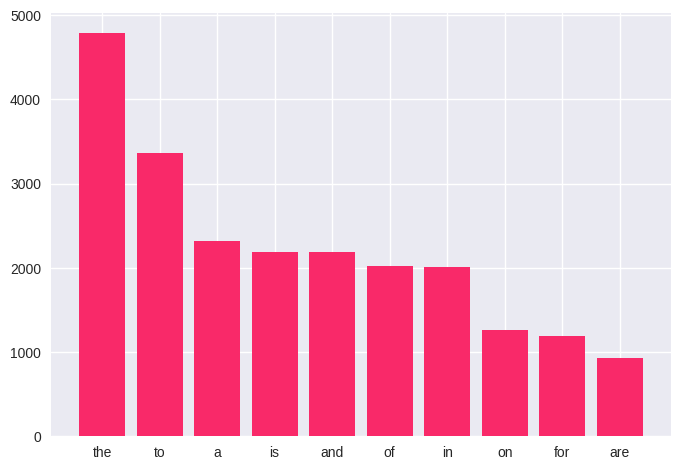

In [42]:
corpus=create_corpus("Negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

#### A lot stopwords are present. Require preprocessing



<a id="7"></a>
    
<font size="+2" color="indigo"><b>7. Punctuations</b></font><br>






<BarContainer object of 22 artists>

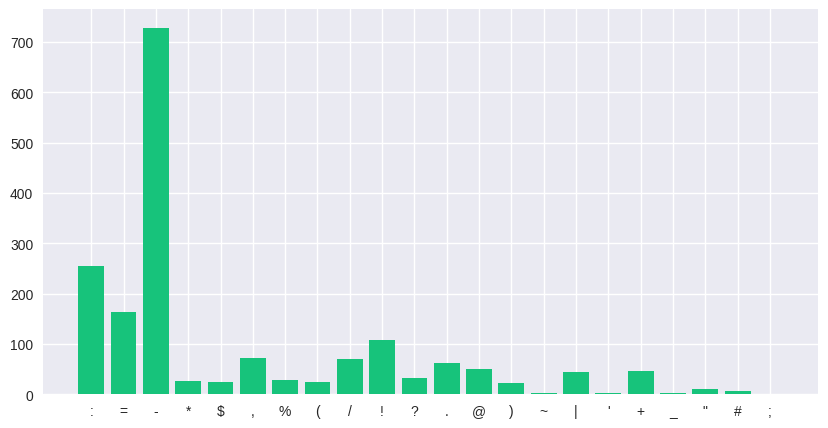

In [43]:
plt.figure(figsize=(10,5))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 24 artists>

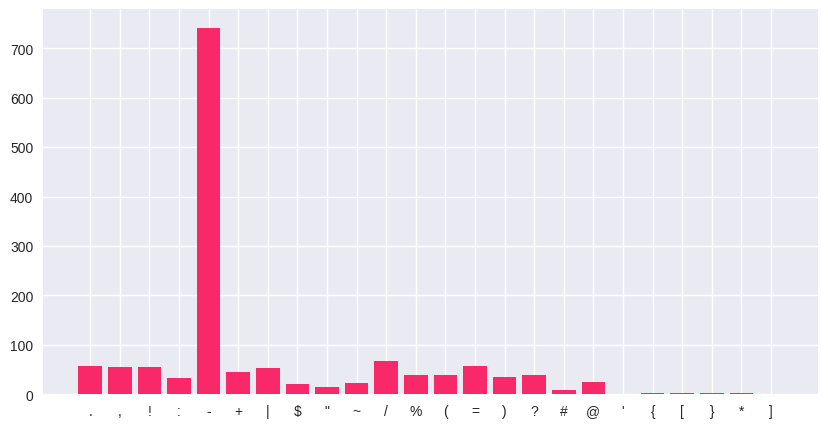

In [44]:
plt.figure(figsize=(10,5))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

#### More cleaning to be done



<a id="8"></a>
    
<font size="+2" color="indigo"><b>8. Common Words</b></font><br>



In [45]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<Axes: >

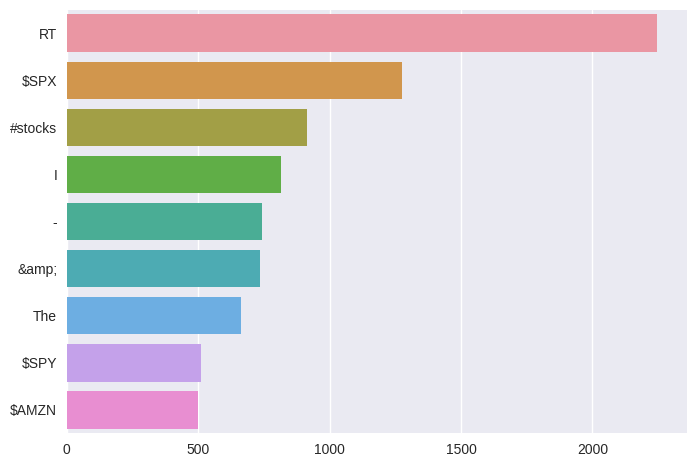

In [46]:
sns.barplot(x=y,y=x)

#### Common words feature punctuations, we need extensive data cleaning



<a id="9"></a>
    
<font size="+2" color="indigo"><b>9. Hashtags</b></font><br>


In [47]:
£def find_hash(text):
    text=str(text)
    #print(text)
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
df['hash']=df['text'].apply(lambda x:find_hash(x))
temp=df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
df['text']=df['text'].astype(str)
df

SyntaxError: ignored

#### While lower casing is required, we can see that hashtags contain keywords related to coronavirus



<a id="11"></a>
    
<font size="+2" color="indigo"><b>11. Pre-processing</b></font><br>



In [ ]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df['text']=df['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['text']=df['text'].apply(lambda x:remove_html(x))



In [ ]:

# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df['text']=df['text'].apply(lambda x:lower(x))


# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df['text']=df['text'].apply(lambda x:remove_num(x))



In [ ]:

#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df['text']=df['text'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text']=df['text'].apply(lambda x:remove_stopwords(x))



In [48]:
#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['text']=df['text'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['text']=df['text'].apply(lambda x:remove_hash(x))


In [49]:

#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
def stemming(text):
    ps = PorterStemmer()

    return" ".join([ps.stem(word) for word in str(text).split()])

def lemmatizing(text):
    wordnet_lemmatizer = WordNetLemmatizer()

    return" ".join([wordnet_lemmatizer.lemmatize(word) for word in str(text).split()])
df['text']=df['text'].apply(lambda x:remove_space(x))
df['text']=df['text'].apply(lambda x:stemming(x))




<a id="12"></a>
    
<font size="+2" color="indigo"><b>12. Wordclouds</b></font><br>


In [50]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

# df_pos = df[df["Sentiment"]=="Positive"]
# df_neg = df[df["Sentiment"]=="Negative"]

# comment_words = ''
# stopwords = set(STOPWORDS)

# for val in df_pos.text:

#     # typecaste each val to string
#     val = str(val)

#     # split the value
#     tokens = val.split()

#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()

#     comment_words += " ".join(tokens)+" "


# wordcloud1 = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 colormap="Greens",
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)

# ax1.imshow(wordcloud1)
# ax1.axis('off')
# ax1.set_title('Positive Sentiment',fontsize=35);

# comment_words = ''

# for val in df_neg.text:

#     # typecaste each val to string
#     val = str(val)

#     # split the value
#     tokens = val.split()

#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()

#     comment_words += " ".join(tokens)+" "




# wordcloud2 = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 colormap="Reds",
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
# ax2.imshow(wordcloud2)
# ax2.axis('off')
# ax2.set_title('Negative Sentiment',fontsize=35);





In [51]:
# del df_pos
# del df_neg




<a id="13"></a>
    
<font size="+2" color="indigo"><b>13. N-grams</b></font><br>


## Unigrams

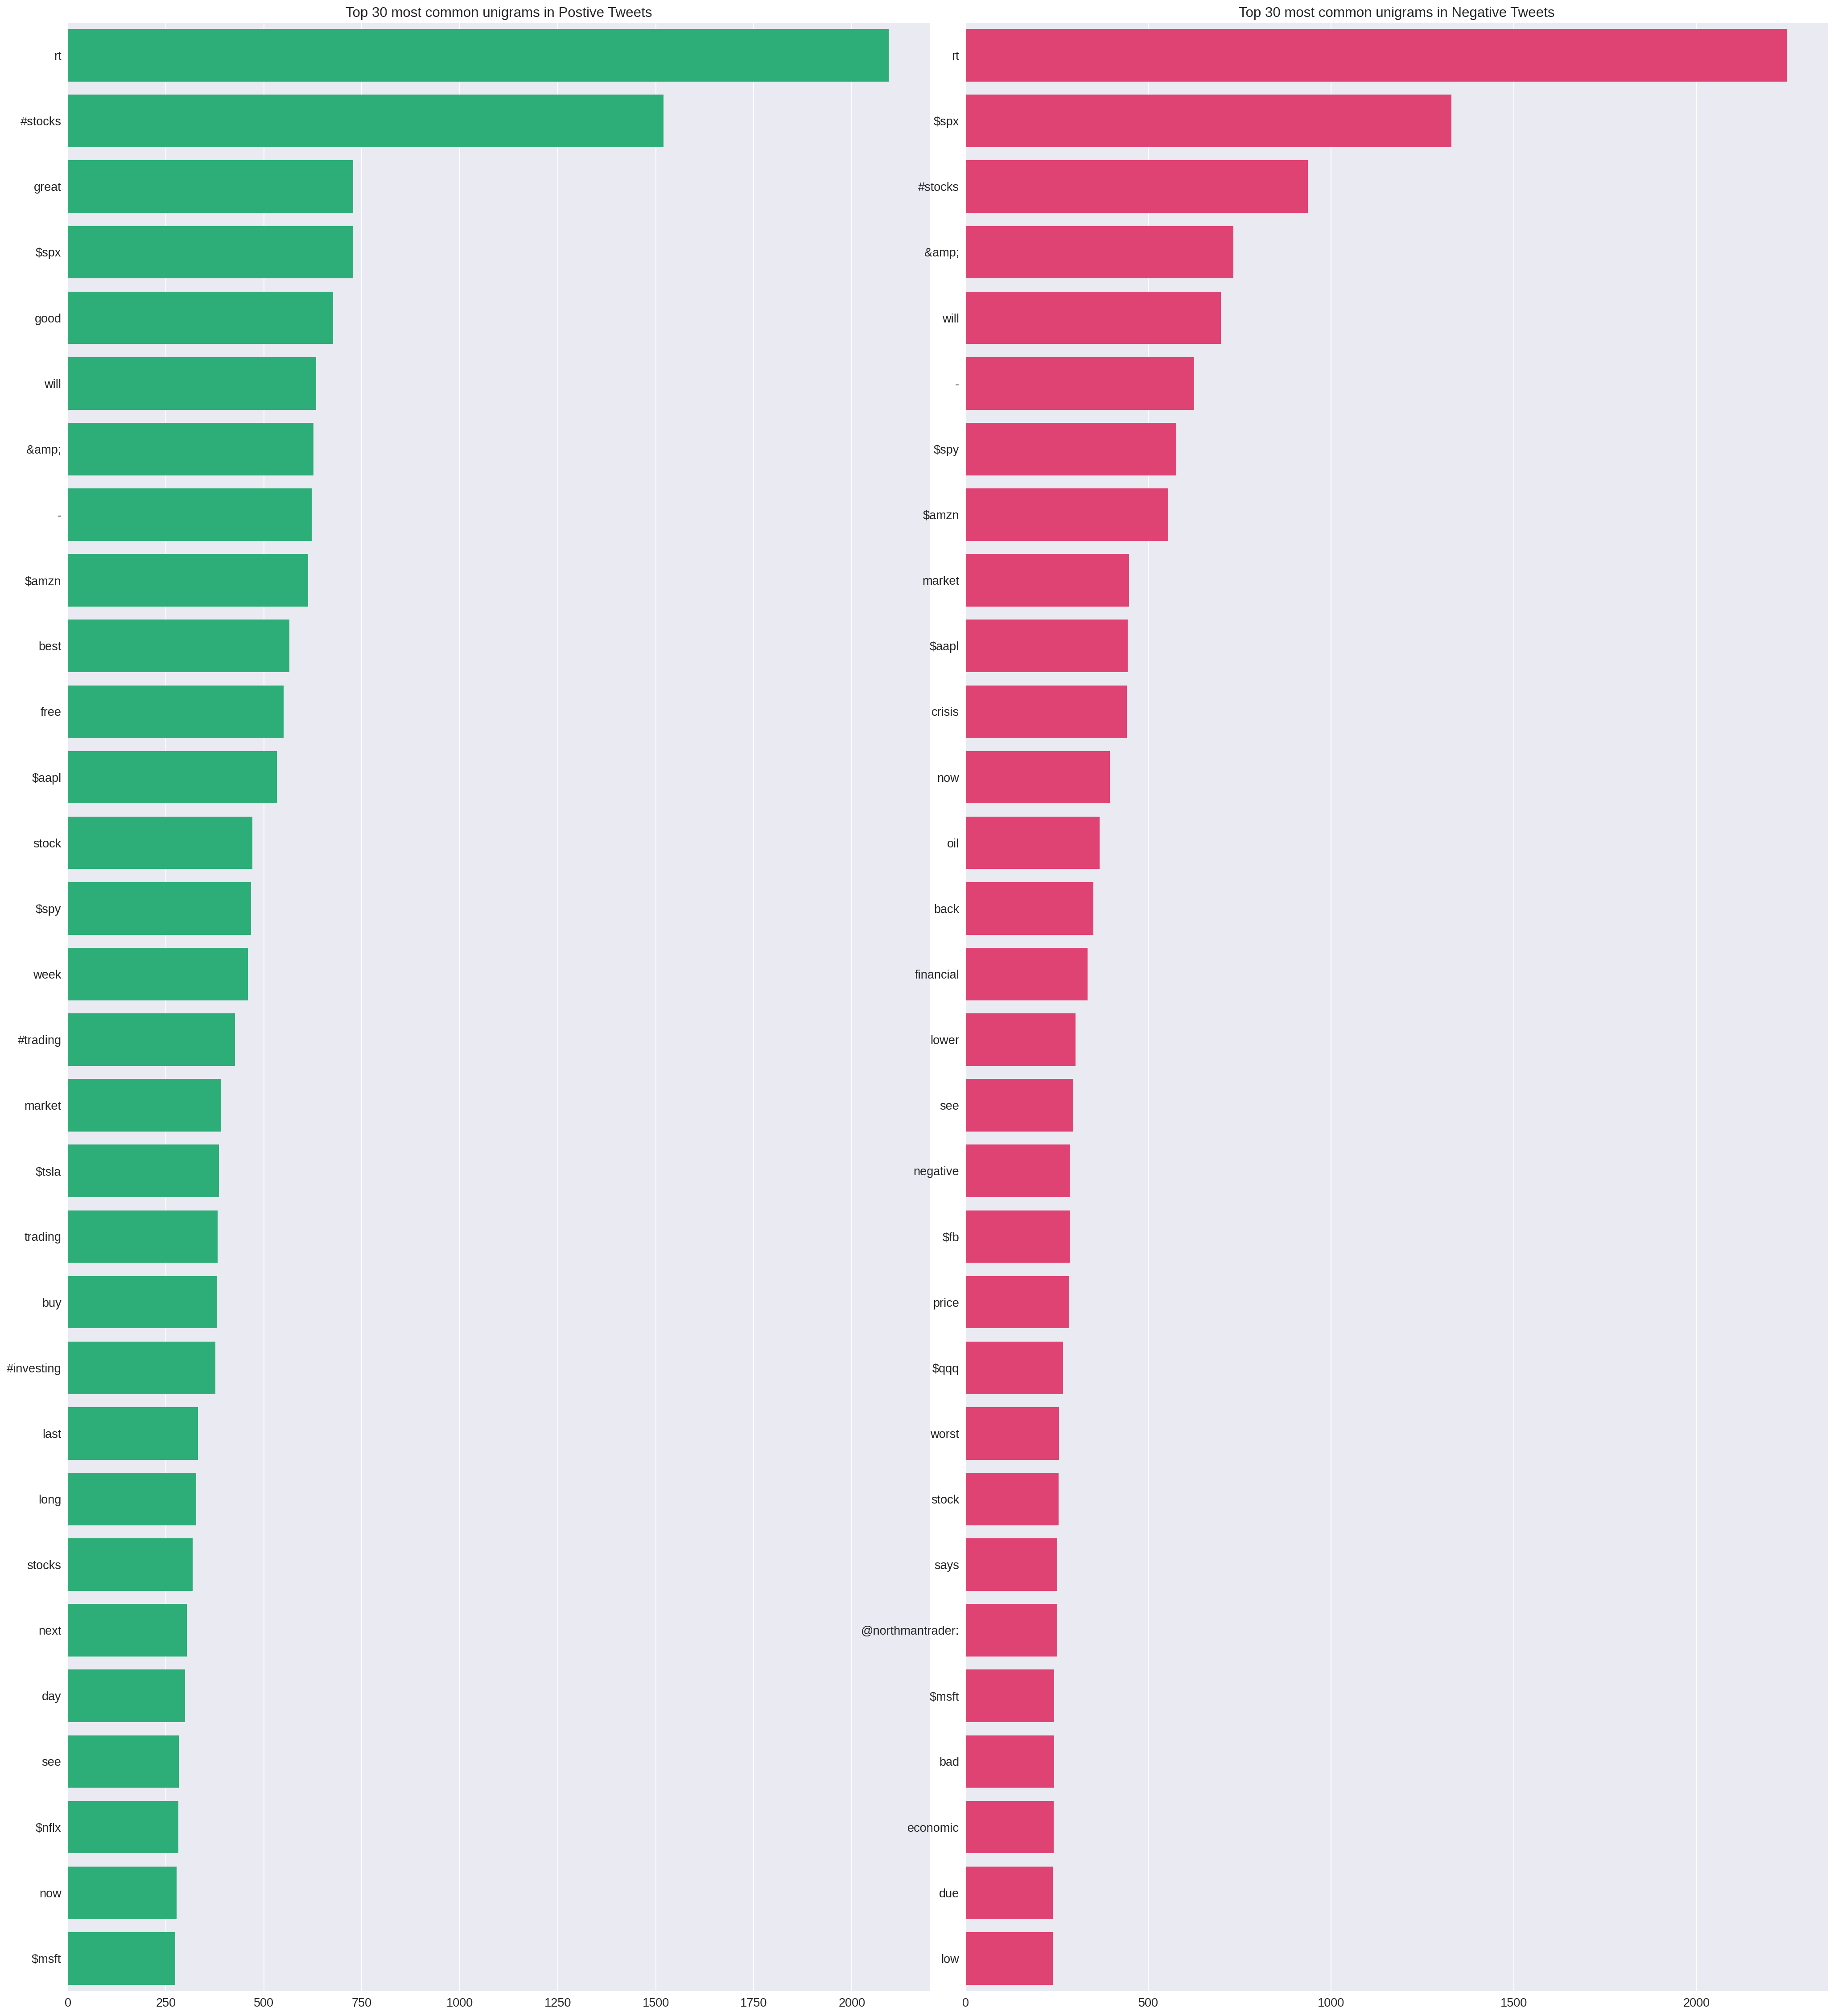

In [52]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30



positive= train["Sentiment"]== "Positive"
negative= train["Sentiment"]== "Negative"


positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in train[positive]['text']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1

for tweet in train[negative]['text']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1


df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')



for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)

plt.show()

## Bi grams

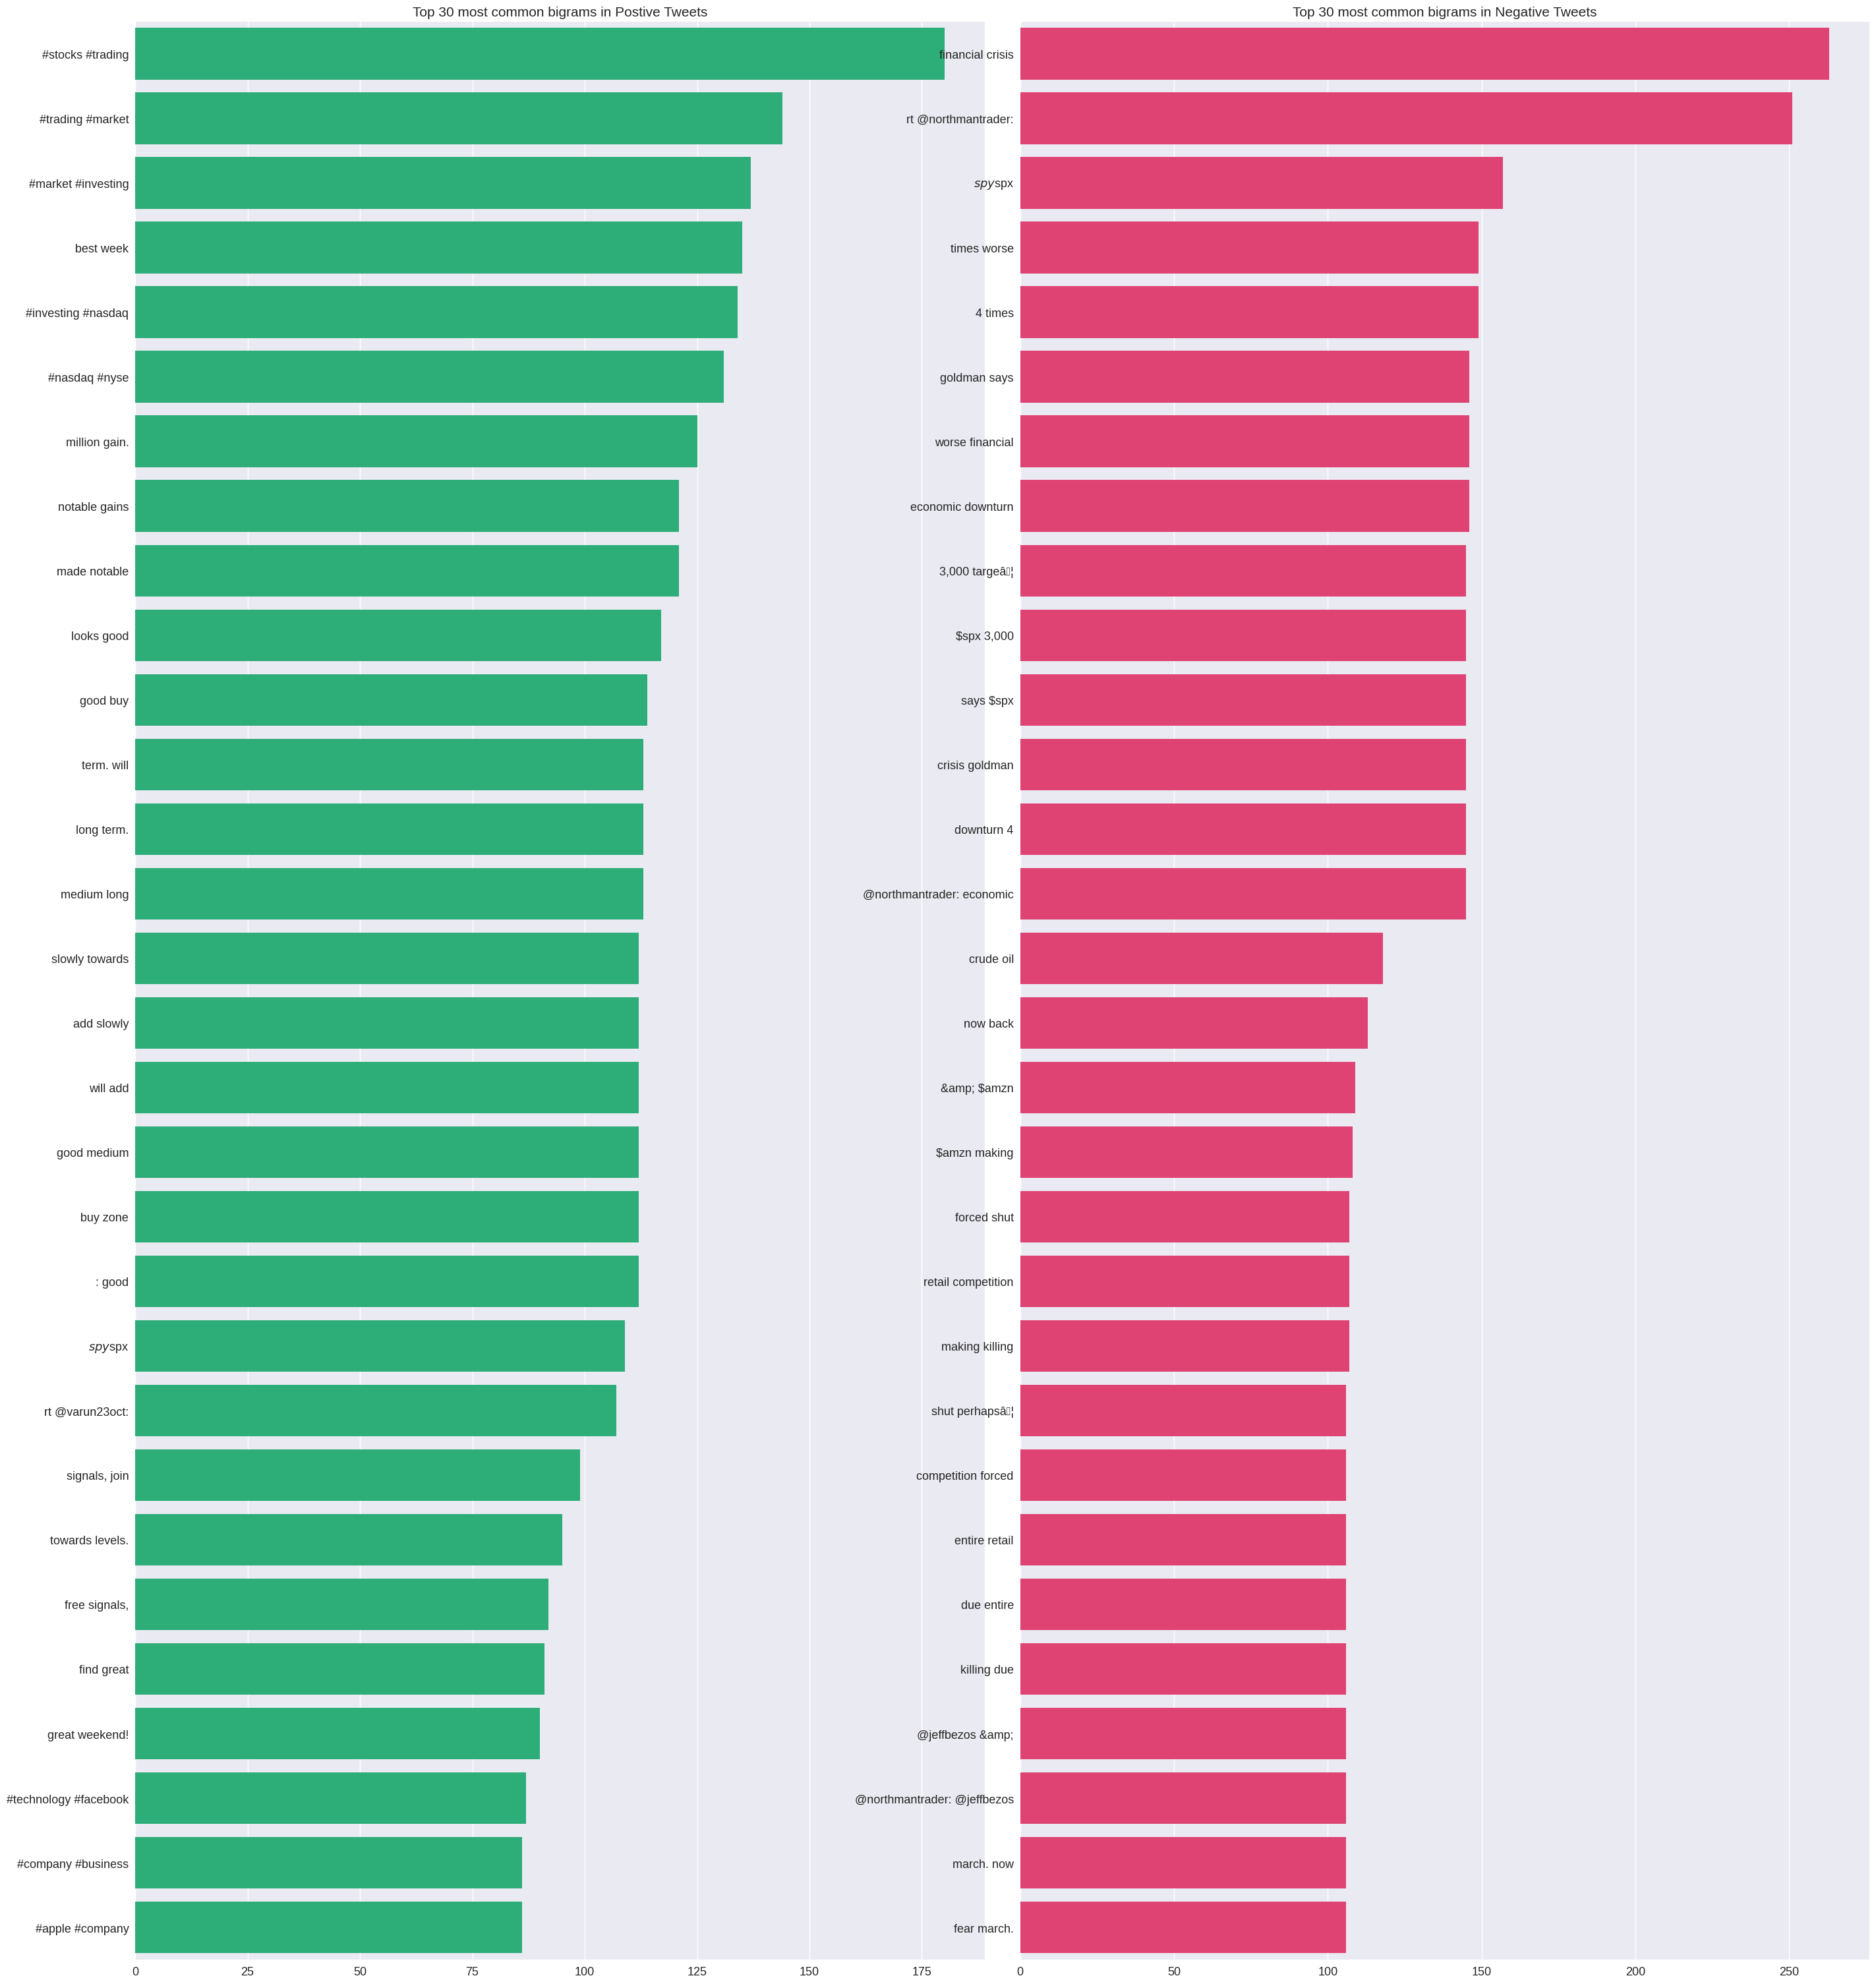

In [53]:
# Bigrams
positive_bigrams = defaultdict(int)

negative_bigrams = defaultdict(int)

for tweet in train[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1

for tweet in train[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1



df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')


for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)

plt.show()

# Tri-grams

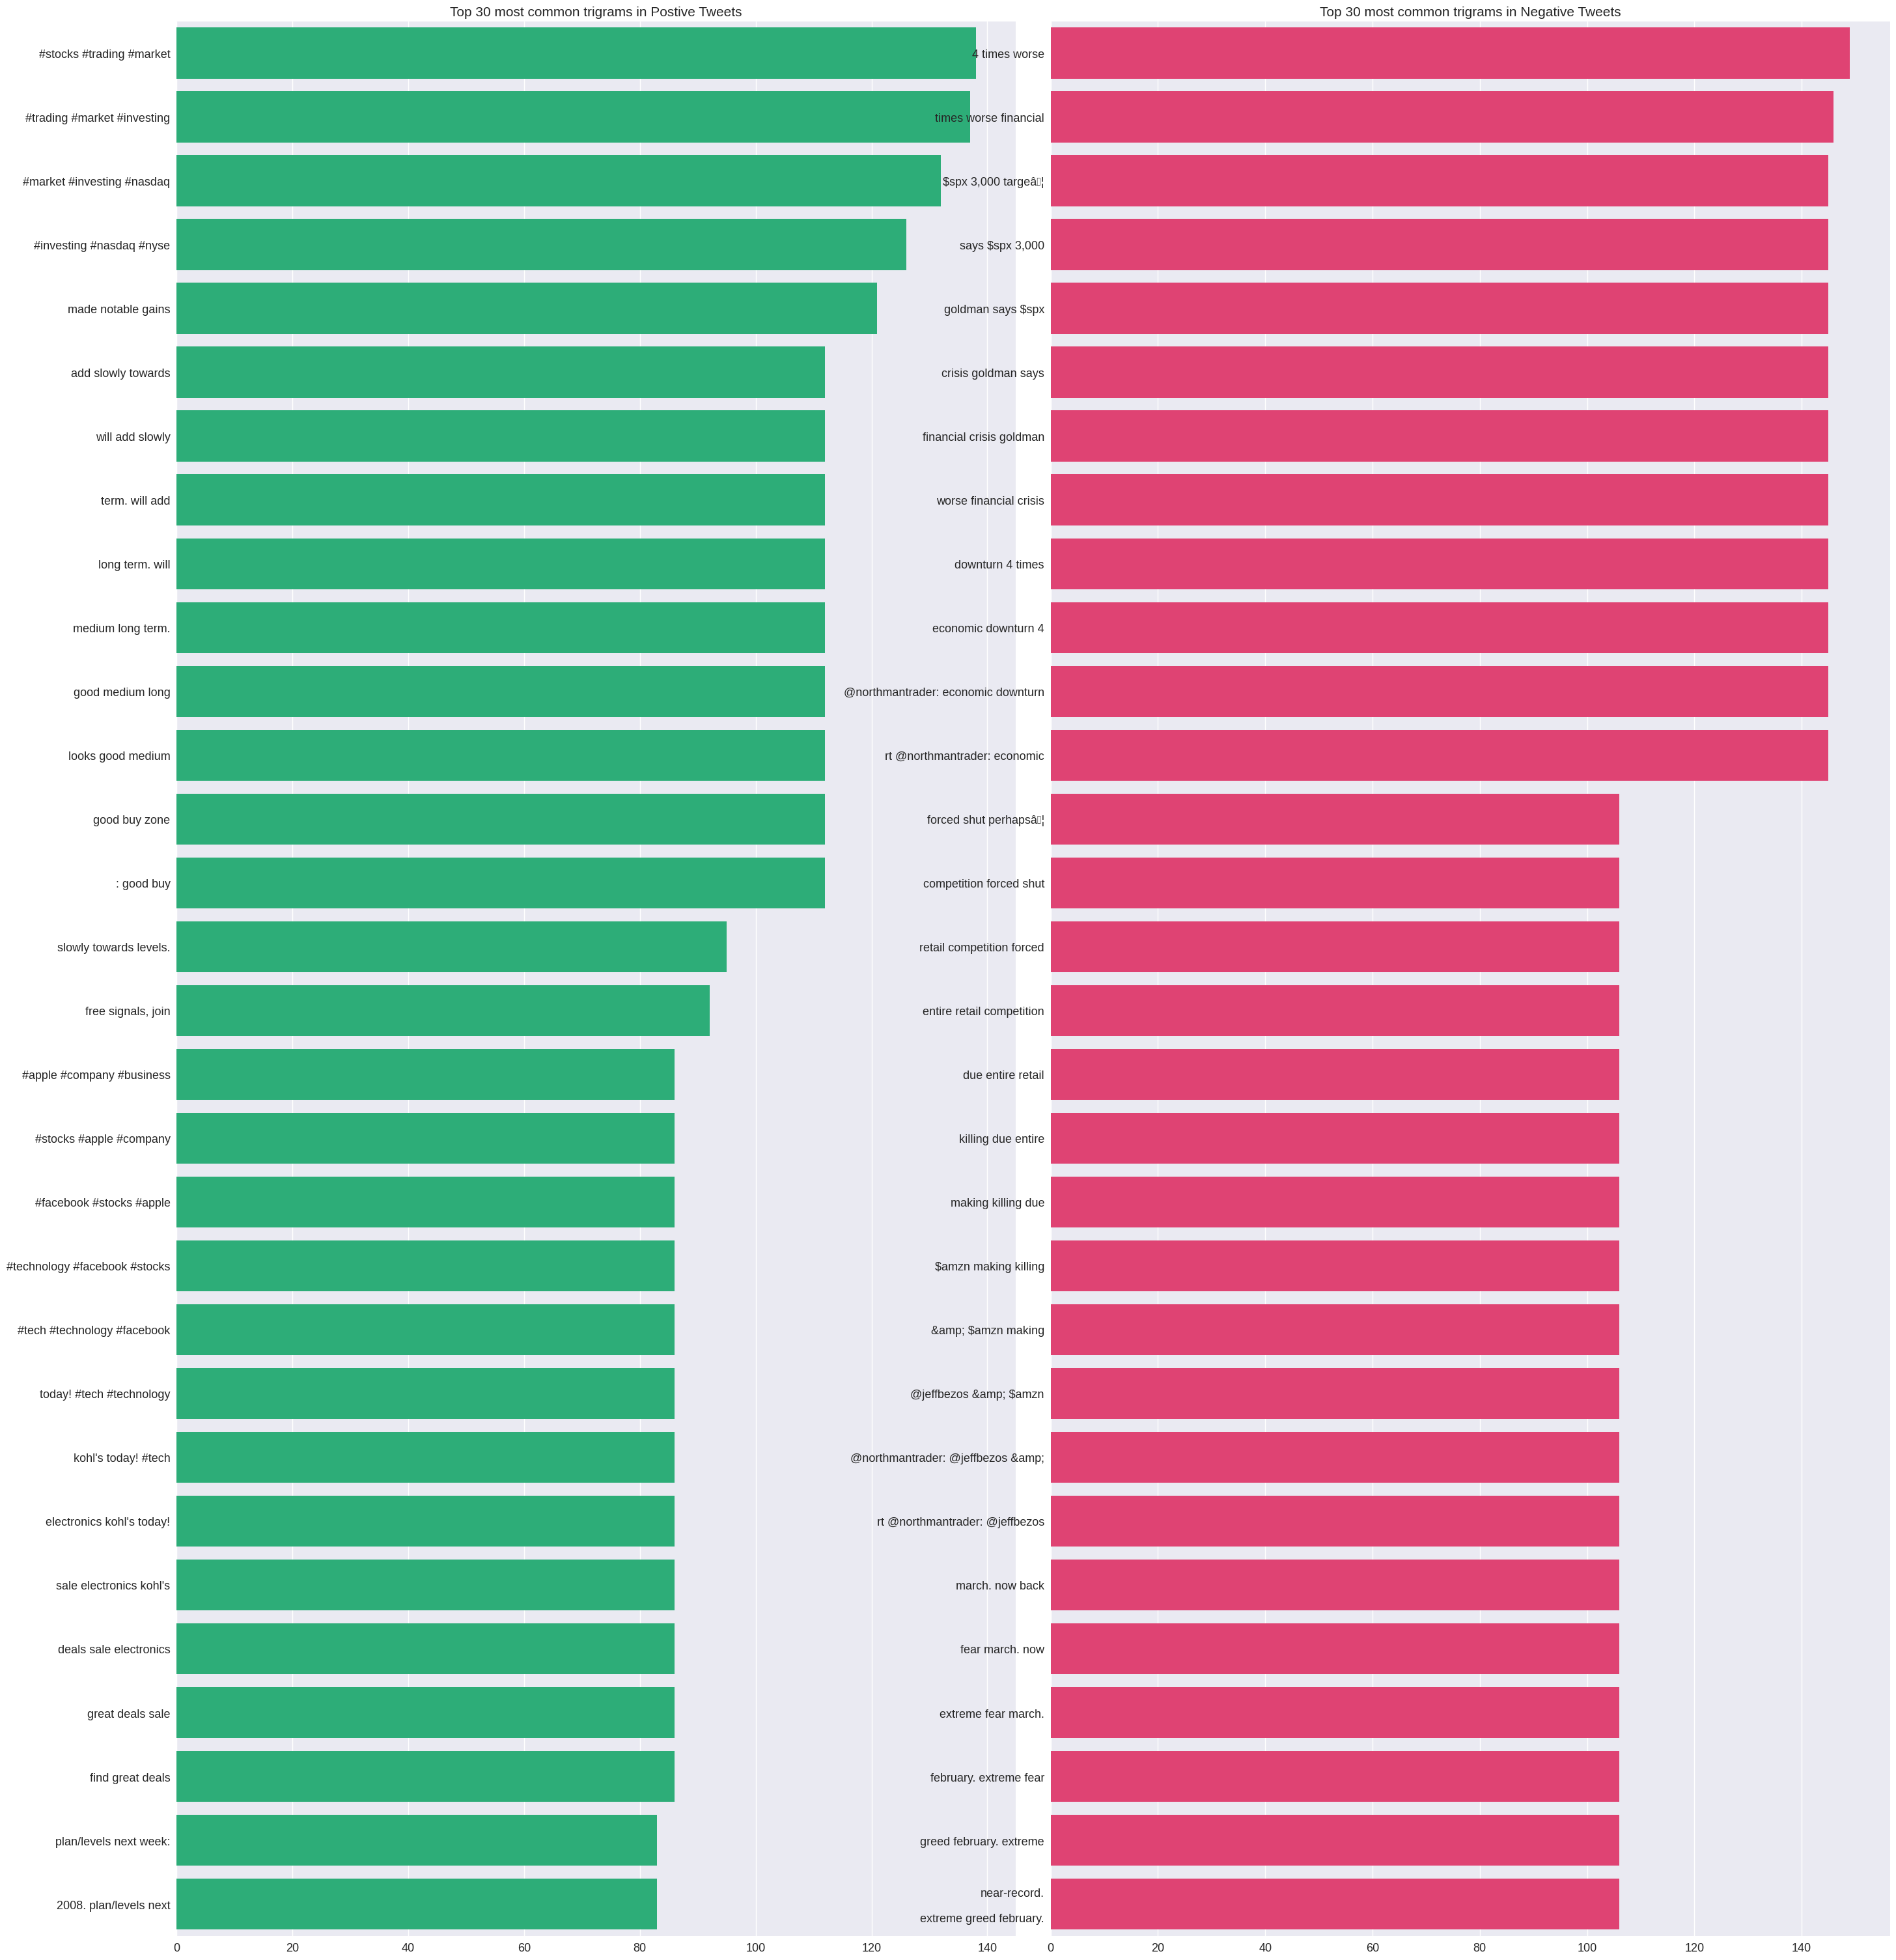

In [54]:
# Trigrams
positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in train[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1

for tweet in train[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1



df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')



for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)

plt.show()

In [55]:
dffinal=df[["text","Sentiment"]]
dffinal

,text,Sentiment
0,"rt : $spx 10,000. no growth required.",Neutral
1,$mro possibl gap fill to $6.76 today with opec...,Neutral
2,the race to 50 million subscribers... - $amzn ...,Neutral
3,rt : $spx is 19% off the high and +25% off the...,Neutral
4,rt : $spx keep hold 2761 as weaker sector grin...,Negative
...,...,...
22503,definit $aapl. even worse. we own it dure it c...,Negative
22504,rt : $goog hard bounc out of the demand zone t...,Neutral
22505,rt : i guess iâm lucki i did applecar suppor...,Positive
22506,$msft microsoft ha been rest and consolid nice...,Positive


In [56]:
df

,text,Sentiment
0,"rt : $spx 10,000. no growth required.",Neutral
1,$mro possibl gap fill to $6.76 today with opec...,Neutral
2,the race to 50 million subscribers... - $amzn ...,Neutral
3,rt : $spx is 19% off the high and +25% off the...,Neutral
4,rt : $spx keep hold 2761 as weaker sector grin...,Negative
...,...,...
22503,definit $aapl. even worse. we own it dure it c...,Negative
22504,rt : $goog hard bounc out of the demand zone t...,Neutral
22505,rt : i guess iâm lucki i did applecar suppor...,Positive
22506,$msft microsoft ha been rest and consolid nice...,Positive


In [57]:

# training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [58]:
# print(len(df))

In [59]:
# from sklearn.feature_extraction.text import CountVectorizer
# countvector=CountVectorizer(ngram_range=(1,2))
# #countvector=CountVectorizer(ngram_range=(2,2))
# traindataset=countvector.fit_transform(training_data['text'].tolist())

In [60]:
# Perform feature selection on the countvector output
"""
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

k = 5000
countvector=CountVectorizer(ngram_range=(2,2))
traindataset = countvector.fit_transform(training_data['text'].tolist())
selector = SelectKBest(chi2, k=k)
traindataset_selected = selector.fit_transform(traindataset, training_data['Sentiment'])

# Get the indices of the selected features

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [countvector.get_feature_names()[i] for i in feature_indices]
"""

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.feature_selection import SelectKBest, chi2\n\nk = 5000\ncountvector=CountVectorizer(ngram_range=(2,2))\ntraindataset = countvector.fit_transform(training_data['text'].tolist())\nselector = SelectKBest(chi2, k=k)\ntraindataset_selected = selector.fit_transform(traindataset, training_data['Sentiment'])\n\n# Get the indices of the selected features\n\n# Get the indices of the selected features\nfeature_indices = selector.get_support(indices=True)\n\n# Get the names of the selected features\nselected_feature_names = [countvector.get_feature_names()[i] for i in feature_indices]\n"

In [61]:
# randomclassifier=RandomForestClassifier()
# randomclassifier.fit(traindataset,training_data['Sentiment'])

In [62]:
# ## Predict for the Test Dataset

# test_dataset = countvector.transform(testing_data['text'].tolist())
# predictions = randomclassifier.predict(test_dataset)

In [63]:
# matrix=confusion_matrix(testing_data['Sentiment'],predictions)
# print(matrix)
# score=accuracy_score(testing_data['Sentiment'],predictions)
# print(score)
# report=classification_report(testing_data['Sentiment'],predictions)
# print(report)

In [64]:
# model =   LinearSVC()
# SVC=model.fit(traindataset,training_data['Sentiment'])

In [65]:
# test_dataset = countvector.transform(testing_data['text'].tolist())
# predictions = SVC.predict(test_dataset)
# matrix=confusion_matrix(testing_data['Sentiment'],predictions)
# print(matrix)
# score=accuracy_score(testing_data['Sentiment'],predictions)
# print(score)
# report=classification_report(testing_data['Sentiment'],predictions)
# print(report)

In [66]:

# model =   MultinomialNB()
# NB=model.fit(traindataset,training_data['Sentiment'])

In [67]:
# test_dataset = countvector.transform(testing_data['text'].tolist())
# predictions = NB.predict(test_dataset)
# matrix=confusion_matrix(testing_data['Sentiment'],predictions)
# print(matrix)
# score=accuracy_score(testing_data['Sentiment'],predictions)
# print(score)
# report=classification_report(testing_data['Sentiment'],predictions)
# print(report)

In [68]:
# model=ExtraTreesClassifier()
# ETC=model.fit(traindataset,training_data['Sentiment'])

In [69]:
# test_dataset = countvector.transform(testing_data['text'].tolist())
# predictions = ETC.predict(test_dataset)
# matrix=confusion_matrix(testing_data['Sentiment'],predictions)
# print(matrix)
# score=accuracy_score(testing_data['Sentiment'],predictions)
# print(score)
# report=classification_report(testing_data['Sentiment'],predictions)
# print(report)

In [70]:
# #############ensemble model
# from sklearn.ensemble import VotingClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier


# # Initialize SVM models with different hyperparameters
# svm_model1 = SVC(kernel='linear', C=1.0)
# svm_model2 = SVC(kernel='rbf', C=10.0, gamma=0.1)

# # Initialize Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# # Combine models into an ensemble model
# ensemble_model = VotingClassifier(estimators=[('svm1', svm_model1), ('svm2', svm_model2), ('rf', rf_model)])

# # Train ensemble model on training data
# ensemble_model.fit(traindataset,training_data['Sentiment'])



In [71]:
# test_dataset = countvector.transform(testing_data['text'].tolist())
# predictions = ensemble_model.predict(test_dataset)
# matrix=confusion_matrix(testing_data['Sentiment'],predictions)
# print(matrix)
# score=accuracy_score(testing_data['Sentiment'],predictions)
# print(score)
# report=classification_report(testing_data['Sentiment'],predictions)
# print(report)

In [72]:
# ##############Error Analysis


# # Get indices of misclassified examples
# misclassified_indices = [i for i, y_true, y_pred in zip(range(len(testing_data['Sentiment'])), testing_data['Sentiment'], predictions) if y_true != y_pred]

# # Get misclassified examples
# misclassified_examples = [traindataset[i] for i in misclassified_indices]

# # Print misclassified examples and their predicted labels
# for example, prediction in zip(misclassified_examples, predictions[misclassified_indices]):
#     print(f"Example: {example}\nPredicted label: {prediction}\n")


In [73]:
# #################grid search cv
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Load data


# # Define parameter grid for SVM model
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# # Initialize SVM model
# svm_model = SVC()

# # Initialize GridSearchCV object
# grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit GridSearchCV object on training data
# grid_search.fit(traindataset,training_data['Sentiment'])

# # Get best hyperparameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate model with best hyperparameters on test data
# best_model = SVC(**best_params)
# best_model.fit(traindataset,training_data['Sentiment'])
# accuracy = best_model.score(test_dataset, testing_data['Sentiment'])


In [74]:
# best_model.score(test_dataset, testing_data['Sentiment'])

In [75]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier

# # Splitting data
# training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

# # Using TfidfVectorizer instead of CountVectorizer
# tfidfvector=TfidfVectorizer(ngram_range=(1,2))
# traindataset=tfidfvector.fit_transform(training_data['text'].tolist())

# # Random Forest Classifier with GridSearch for Hyperparameter Tuning
# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
# rf_model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(traindataset, training_data['Sentiment'])

# best_rf_model = grid_search.best_estimator_
# print(f'Best Random Forest parameters: {grid_search.best_params_}')

# # Evaluate on test data
# test_dataset = tfidfvector.transform(testing_data['text'].tolist())
# predictions = best_rf_model.predict(test_dataset)

# # Print results
# matrix = confusion_matrix(testing_data['Sentiment'], predictions)
# print(matrix)
# score = accuracy_score(testing_data['Sentiment'], predictions)
# print(score)
# report = classification_report(testing_data['Sentiment'], predictions)
# print(report)

# # MultinomialNB, no changes
# model = MultinomialNB()
# NB = model.fit(traindataset,training_data['Sentiment'])
# predictions = NB.predict(test_dataset)

# matrix = confusion_matrix(testing_data['Sentiment'], predictions)
# print(matrix)
# score = accuracy_score(testing_data['Sentiment'], predictions)
# print(score)
# report = classification_report(testing_data['Sentiment'], predictions)
# print(report)

# # Ensemble model
# # Initialize SVM models with different hyperparameters
# svm_model1 = SVC(kernel='linear', C=1.0)
# svm_model2 = SVC(kernel='rbf', C=10.0, gamma=0.1)

# # Initialize Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# # Combine models into an ensemble model
# ensemble_model = VotingClassifier(estimators=[('svm1', svm_model1), ('svm2', svm_model2), ('rf', best_rf_model)])

# # Train ensemble model on training data
# ensemble_model.fit(traindataset,training_data['Sentiment'])
# predictions = ensemble_model.predict(test_dataset)

# matrix = confusion_matrix(testing_data['Sentiment'], predictions)
# print(matrix)
# score = accuracy_score(testing_data['Sentiment'], predictions)
# print(score)
# report = classification_report(testing_data['Sentiment'], predictions)
# print(report)


In [76]:
!pip install transformers
!pip install imbalanced-learn
!pip install tensorflow



In [77]:
# import tensorflow as tf
# from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import RandomOverSampler

# # Define tokenizer
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Fit the LabelEncoder and transform the labels
# df['Sentiment'] = le.fit_transform(df['Sentiment'])

# train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['Sentiment'],
#                                                                     random_state=0,
#                                                                     test_size=0.3,
#                                                                     stratify=df['Sentiment'])

# # Balance the dataset
# oversample = RandomOverSampler(sampling_strategy='minority')
# train_text_over, train_labels_over = oversample.fit_resample(train_text.values.reshape(-1, 1), train_labels)

# # We further split our training data into validation and test sets
# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
#                                                                 random_state=0,
#                                                                 test_size=0.5,
#                                                                 stratify=temp_labels)

# # Tokenize the data
# train_encodings = tokenizer(list(train_text_over[:,0]), truncation=True, padding=True)
# val_encodings = tokenizer(list(val_text), truncation=True, padding=True)
# test_encodings = tokenizer(list(test_text), truncation=True, padding=True)

# # Prepare the data for TensorFlow
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(train_encodings),
#     train_labels_over
# )).shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE)

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(val_encodings),
#     val_labels
# )).batch(16).prefetch(tf.data.AUTOTUNE)

# test_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(test_encodings),
#     test_labels
# )).batch(16).prefetch(tf.data.AUTOTUNE)

# # Define the model
# num_labels = len(df['Sentiment'].unique())
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# # Train the model
# model.fit(train_dataset, validation_data=val_dataset, epochs=3)

# # Predict for test set
# preds = model.predict(test_dataset.batch(16))

# # Convert logits to class labels
# pred_labels = tf.argmax(preds.logits, axis=1).numpy()

# # Print classification report
# print(classification_report(test_labels, pred_labels))

In [78]:
# import tensorflow as tf
# from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import RandomOverSampler

# # Define tokenizer
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Fit the LabelEncoder and transform the labels
# df['Sentiment'] = le.fit_transform(df['Sentiment'])

# train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['Sentiment'],
#                                                                     random_state=0,
#                                                                     test_size=0.3,
#                                                                     stratify=df['Sentiment'])

# # Balance the dataset
# oversample = RandomOverSampler(sampling_strategy='minority')
# train_text_over, train_labels_over = oversample.fit_resample(train_text.values.reshape(-1, 1), train_labels)

# # We further split our training data into validation and test sets
# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
#                                                                 random_state=0,
#                                                                 test_size=0.5,
#                                                                 stratify=temp_labels)

# # Tokenize the data
# train_encodings = tokenizer(list(train_text_over[:,0]), truncation=True, padding=True)
# val_encodings = tokenizer(list(val_text), truncation=True, padding=True)
# test_encodings = tokenizer(list(test_text), truncation=True, padding=True)

# # Prepare the data for TensorFlow
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(train_encodings),
#     train_labels_over
# )).shuffle(1000).batch(8).prefetch(tf.data.AUTOTUNE)

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(val_encodings),
#     val_labels
# )).batch(8).prefetch(tf.data.AUTOTUNE)

# test_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(test_encodings),
#     test_labels
# )).batch(8).prefetch(tf.data.AUTOTUNE)

# # Define the model
# num_labels = len(df['Sentiment'].unique())
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# # Train the model
# model.fit(train_dataset, validation_data=val_dataset, epochs=4)

# # Predict for test set
# preds = model.predict(test_dataset)

# # Convert logits to class labels
# pred_labels = tf.argmax(preds.logits, axis=1).numpy()

# # Print classification report
# print(classification_report(test_labels, pred_labels))

In [79]:
# import tensorflow as tf
# from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import RandomOverSampler

# # Define tokenizer
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Fit the LabelEncoder and transform the labels
# df['Sentiment'] = le.fit_transform(df['Sentiment'])

# train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['Sentiment'],
#                                                                     random_state=0,
#                                                                     test_size=0.3,
#                                                                     stratify=df['Sentiment'])

# # Balance the dataset
# oversample = RandomOverSampler(sampling_strategy='minority')
# train_text_over, train_labels_over = oversample.fit_resample(train_text.values.reshape(-1, 1), train_labels)

# # We further split our training data into validation and test sets
# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
#                                                                 random_state=0,
#                                                                 test_size=0.5,
#                                                                 stratify=temp_labels)

# # Tokenize the data
# train_encodings = tokenizer(list(train_text_over[:,0]), truncation=True, padding=True)
# val_encodings = tokenizer(list(val_text), truncation=True, padding=True)
# test_encodings = tokenizer(list(test_text), truncation=True, padding=True)

# # Prepare the data for TensorFlow
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(train_encodings),
#     train_labels_over
# )).shuffle(1000).batch(8).prefetch(tf.data.AUTOTUNE)

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(val_encodings),
#     val_labels
# )).batch(8).prefetch(tf.data.AUTOTUNE)

# test_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(test_encodings),
#     test_labels
# )).batch(8).prefetch(tf.data.AUTOTUNE)

# # Define the model
# num_labels = len(df['Sentiment'].unique())
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# # Train the model initially
# print("Starting initial training...")
# model.fit(train_dataset, validation_data=val_dataset, epochs=4)

# # Reduce learning rate and fine-tune
# optimizer.learning_rate = 1e-5
# print("Starting fine-tuning...")
# model.fit(train_dataset, validation_data=val_dataset, epochs=2)

# # Predict for test set
# preds = model.predict(test_dataset)

# # Convert# Convert logits to class labels
# pred_labels = tf.argmax(preds.logits, axis=1).numpy()

# # Print classification report
# print(classification_report(test_labels, pred_labels))

In [80]:
# import tensorflow as tf
# from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import RandomOverSampler

# # Define tokenizer
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Fit the LabelEncoder and transform the labels
# df['Sentiment'] = le.fit_transform(df['Sentiment'])

# train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['Sentiment'],
#                                                                     random_state=0,
#                                                                     test_size=0.3,
#                                                                     stratify=df['Sentiment'])

# # Balance the dataset
# oversample = RandomOverSampler(sampling_strategy='minority')
# train_text_over, train_labels_over = oversample.fit_resample(train_text.values.reshape(-1, 1), train_labels)

# # We further split our training data into validation and test sets
# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
#                                                                 random_state=0,
#                                                                 test_size=0.5,
#                                                                 stratify=temp_labels)

# # Tokenize the data
# train_encodings = tokenizer(list(train_text_over[:,0]), truncation=True, padding=True)
# val_encodings = tokenizer(list(val_text), truncation=True, padding=True)
# test_encodings = tokenizer(list(test_text), truncation=True, padding=True)

# # Prepare the data for TensorFlow
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(train_encodings),
#     train_labels_over
# )).shuffle(1000).batch(8).prefetch(tf.data.AUTOTUNE)

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(val_encodings),
#     val_labels
# )).batch(8).prefetch(tf.data.AUTOTUNE)

# test_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(test_encodings),
#     test_labels
# )).batch(8).prefetch(tf.data.AUTOTUNE)

# # Define the model
# num_labels = len(df['Sentiment'].unique())
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)


# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# # Train the model initially
# print("Starting initial training...")
# model.fit(train_dataset, validation_data=val_dataset, epochs=5)

# # Reduce learning rate and fine-tune
# optimizer.learning_rate = 1e-5
# print("Starting fine-tuning...")
# model.fit(train_dataset, validation_data=val_dataset, epochs=3)

# # Predict for test set
# preds = model.predict(test_dataset)

# # Convert# Convert logits to class labels
# pred_labels = tf.argmax(preds.logits, axis=1).numpy()

# # Print classification report
# print(classification_report(test_labels, pred_labels))


### last improvement

In [81]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder and transform the labels
df['Sentiment'] = le.fit_transform(df['Sentiment'])

train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['Sentiment'], random_state=0, test_size=0.3, stratify=df['Sentiment'])

# Balance the dataset
oversample = RandomOverSampler(sampling_strategy='minority')
train_text_over, train_labels_over = oversample.fit_resample(train_text.values.reshape(-1, 1), train_labels)

# We further split our training data into validation and test sets
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, random_state=0, test_size=0.5, stratify=temp_labels)

# Tokenize the data
train_encodings = tokenizer(list(train_text_over[:,0]), truncation=True, padding=True)
val_encodings = tokenizer(list(val_text), truncation=True, padding=True)
test_encodings = tokenizer(list(test_text), truncation=True, padding=True)

# Prepare the data for TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels_over
)).shuffle(1000).batch(8).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
)).batch(8).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(8).prefetch(tf.data.AUTOTUNE)

# Define the model
num_labels = len(df['Sentiment'].unique())

def create_model():
    model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

# Define Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)

# Initialize Cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Container for validation scores
val_scores = []

# Cross-validation loop
for train, val in kfold.split(train_text_over[:,0], train_labels_over):

    # Create a new model for each fold
    model = create_model()

    # Train the model
    print("Starting initial training...")
    model.fit(train_dataset, validation_data=val_dataset, epochs=5, callbacks=[reduce_lr])

    # Evaluate the model
    scores = model.evaluate(val_dataset, verbose=0)
    print(f"Score for fold {len(val_scores) + 1}: {model.metrics_names[1]} of {scores[1]*100}%")
    val_scores.append(scores[1] * 100)

# Print average validation score
print(f"Average validation score: {np.mean(val_scores)}%")

# Retrain the model with all training data
model = create_model()
model.fit(train_dataset, epochs=5, callbacks=[reduce_lr])

# Predict for test set
preds = model.predict(test_dataset)

# Convert logits to class labels
pred_labels = tf.argmax(preds.logits, axis=1).numpy()

# Print classification report
print(classification_report(test_labels, pred_labels))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Starting initial training...
Epoch 1/5
1970/1970 [==============================] - 361s 168ms/step - loss: 0.3425 - accuracy: 0.8749 - val_loss: 0.2459 - val_accuracy: 0.9135 - lr: 5.0000e-05
Epoch 2/5
1970/1970 [==============================] - 309s 157ms/step - loss: 0.1563 - accuracy: 0.9459 - val_loss: 0.2145 - val_accuracy: 0.9325 - lr: 5.0000e-05
Epoch 3/5
1970/1970 [==============================] - 307s 156ms/step - loss: 0.0924 - accuracy: 0.9700 - val_loss: 0.2568 - val_accuracy: 0.9339 - lr: 5.0000e-05
Epoch 4/5
1970/1970 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9791
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
1970/1970 [==============================] - 310s 157ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.2228 - val_accuracy: 0.9381 - lr: 5.0000e-05
Epoch 5/5
1970/1970 [==============================] - 306s 155ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.2425 - val_accuracy: 0.9425 - lr:

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Starting initial training...
Epoch 1/5
1970/1970 [==============================] - 345s 163ms/step - loss: 0.3870 - accuracy: 0.8548 - val_loss: 0.2392 - val_accuracy: 0.9141 - lr: 5.0000e-05
Epoch 2/5
1970/1970 [==============================] - 306s 155ms/step - loss: 0.1796 - accuracy: 0.9400 - val_loss: 0.2486 - val_accuracy: 0.9212 - lr: 5.0000e-05
Epoch 3/5
1970/1970 [==============================] - 306s 155ms/step - loss: 0.1095 - accuracy: 0.9643 - val_loss: 0.2379 - val_accuracy: 0.9254 - lr: 5.0000e-05
Epoch 4/5
1970/1970 [==============================] - 305s 155ms/step - loss: 0.0671 - accuracy: 0.9781 - val_loss: 0.2797 - val_accuracy: 0.9061 - lr: 5.0000e-05
Epoch 5/5
1970/1970 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9820
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
1970/1970 [==============================] - 305s 155ms/step - loss: 0.0533 - accuracy: 0.9820 - val_loss: 0.3202 - val_accuracy: 0.9304 - lr:

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Starting initial training...
Epoch 1/5
1970/1970 [==============================] - 345s 163ms/step - loss: 0.3741 - accuracy: 0.8620 - val_loss: 0.2969 - val_accuracy: 0.8910 - lr: 5.0000e-05
Epoch 2/5
1970/1970 [==============================] - 306s 155ms/step - loss: 0.1678 - accuracy: 0.9426 - val_loss: 0.2447 - val_accuracy: 0.9209 - lr: 5.0000e-05
Epoch 3/5
1970/1970 [==============================] - 305s 155ms/step - loss: 0.1012 - accuracy: 0.9665 - val_loss: 0.2469 - val_accuracy: 0.9227 - lr: 5.0000e-05
Epoch 4/5
1970/1970 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9780
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
1970/1970 [==============================] - 305s 155ms/step - loss: 0.0657 - accuracy: 0.9780 - val_loss: 0.2957 - val_accuracy: 0.9298 - lr: 5.0000e-05
Epoch 5/5
1970/1970 [==============================] - 305s 155ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.2812 - val_accuracy: 0.9372 - lr:

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/5
1970/1970 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.8680

1970/1970 [==============================] - 322s 151ms/step - loss: 0.3587 - accuracy: 0.8680 - lr: 5.0000e-05
Epoch 2/5
1970/1970 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9452

1970/1970 [==============================] - 284s 144ms/step - loss: 0.1575 - accuracy: 0.9452 - lr: 5.0000e-05
Epoch 3/5
1970/1970 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.9673

1970/1970 [==============================] - 284s 144ms/step - loss: 0.1006 - accuracy: 0.9673 - lr: 5.0000e-05
Epoch 4/5
1970/1970 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9766

1970/1970 [==============================] - 284s 144ms/step - loss: 0.0716 - accuracy: 0.9766 - lr: 5.0000e-05
Epoch 5/5
1970/1970 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9841

423/423 [==============================] - 22s 49ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1127
           1       0.92      0.90      0.91      1125
           2       0.96      0.95      0.96      1125

    accuracy                           0.93      3377
   macro avg       0.93      0.93      0.93      3377
weighted avg       0.93      0.93      0.93      3377

